# Увеличение выручки интернет-магазина

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки интернет-магазина. Перед нами поставлена задача - приоретизировать гипотезы, запустить А/В-тест и проанализировать результаты.

**Часть 1. Приоретизация гипотез.** В файле `/datasets/hypothesis.csv` содержится информация о 9 гипотезах по увеличению выручки интернет-магазина с указанными параметрами: `Reach`, `Impact`, `Confidence`, `Effort`.

**Часть 2. Анализ A/B-теста.** Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

## Приоритизация гипотез.

In [1]:
# импортируем необходимые для исследования библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

### Знакомство с данными

In [2]:
# прочитаем файл и присвоим имя переменной
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# зададим максимальную ширину столбцов при помощи опций pandas
pd.set_option('max_colwidth', 120)

display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Структура данных:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета: $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [32]:
# рассчитаем показатель ICE для каждой гипотезы
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


*Вывод*: наиболее приоритетная гипотеза - 8.

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета: $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [4]:
# рассчитаем показатель RICE для каждой гипотезы
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*Вывод*: наиболее приоритетная гипотеза - 7.

### Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

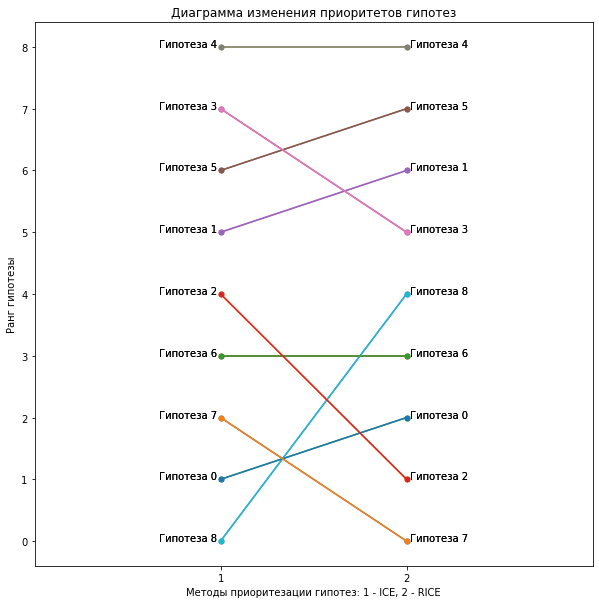

In [31]:
# визуализируем изменения приоретизации с помощью slope graph
hypothesis['Hypothesis_number'] = (['Гипотеза 0', 'Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3', 
                                    'Гипотеза 4', 'Гипотеза 5', 'Гипотеза 6', 'Гипотеза 7', 
                                    'Гипотеза 8'])

rice = (hypothesis[['Hypothesis_number', 'RICE']]
        .sort_values(by='RICE', ascending=False, ignore_index=True))

rice['RICE'] = 2

rice.rename(columns={'RICE': 'metod'}, inplace=True)

ice = (hypothesis[['Hypothesis_number', 'ICE']]
       .sort_values(by='ICE', ascending=False, ignore_index=True))

ice['ICE'] = 1

ice.rename(columns={'ICE': 'metod'}, inplace=True)

df_append = rice.append(ice, ignore_index=False) 


fig, ax = plt.subplots(1, figsize=(10,10))

for i in df_append['Hypothesis_number']:
    temp = df_append[df_append['Hypothesis_number'] == i]
    plt.plot(temp.metod, temp.index, marker='o', markersize=5)
    # end label
    plt.text(temp.metod.values[0]+0.02, temp.index.values[0], i)
    # start label
    plt.text(temp.metod.values[1]-0.02, temp.index.values[1], i, ha='right')
plt.title('Диаграмма изменения приоритетов гипотез')
plt.xlabel('Методы приоритезации гипотез: 1 - ICE, 2 - RICE')
plt.ylabel('Ранг гипотезы')
plt.xlim(0,3)
plt.xticks([1, 2])
plt.yticks();

Выводы:
- при применении `ICE` наиболее перспективные гипотезы: 8, 0, 7, 6;
- при применении `RICE` наиболее перспективные гипотезы: 7, 2, 0, 6;
- три гипотезы попали в число перспективных ("0", "6" и "7") в обоих случаях. Наиболее приоритетная гипотеза при распределении изменилась потому, что параметр `Reach` у гипотезы "7" равен 10. Гипотеза "8" не вошла в четверку при `RICE`, так как параметр `Reach` равен 1.

## Анализ A/B-теста

### Знакомство с  данными

In [34]:
# пропишем функцию для знакомства с данными
def my_info (df):
    '''
    Функция принимает датафрейм
    и применяет встроенные в pd функции:
    - head();
    - info();
    - duplicated().sum().
    '''
    display(df.head())
    df.info()
    print('Явных дубликатов:', df.duplicated().sum())

In [38]:
# прочитаем файл и присвоим имя переменной
# сразу приведем дату к нужному типу
custom_date_parser = lambda x: dt.datetime.strptime(x, '%Y-%m-%d')

orders = pd.read_csv('/datasets/orders.csv',
                     parse_dates=['date'],
                     date_parser=custom_date_parser)

my_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
Явных дубликатов: 0


Структура данных:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [39]:
visitors = pd.read_csv('/datasets/visitors.csv',
                       parse_dates=['date'],
                       date_parser=custom_date_parser)

my_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
Явных дубликатов: 0


Структура данных:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [58]:
# посчитаем количество пользователей по группам
AB = orders.groupby('group').agg({'visitorId':'count'}).reset_index()
print('Количество пользователей в группе А:', AB['visitorId'].values[0],
      '| Доля:', (AB['visitorId'].values[0] / AB['visitorId'].sum()).round(2))
print('Количество пользователей в группе В:', AB['visitorId'].values[1],
     '| Доля:', (AB['visitorId'].values[1] / AB['visitorId'].sum()).round(2))

Количество пользователей в группе А: 557 | Доля: 0.47
Количество пользователей в группе В: 640 | Доля: 0.53


In [59]:
# посчитаем пересечения (пользователи попавшие в обе группы)
duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
print('Количество пересечений:', len(duplicated_users))

Количество пересечений: 58


*Выводы*:
- пропуски в данных отсутствуют;
- дубликаты в данных отсутствуют;
- количество пользователей в группе А - 557 (47%), в группе В - 640 (53%);
- 58 пересечений. В связи с тем, что `id` известны только для платящих их можно оставить.

### Анализ кумулятивных метрик

#### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм `cumulativeData` со столбцами:
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [10]:
# создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitorId': 'nunique',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

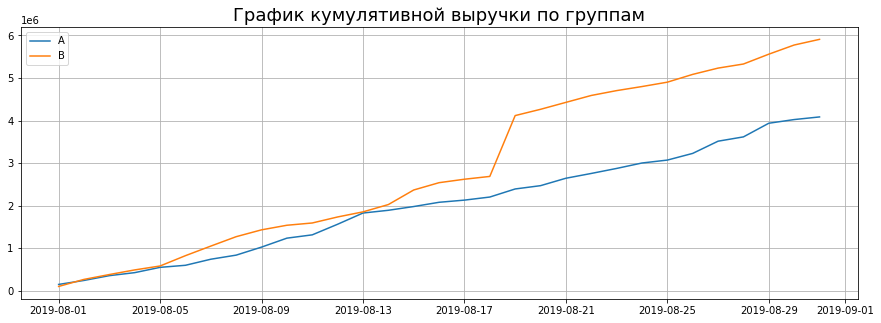

In [11]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))
plt.title('График кумулятивной выручки по группам', fontsize=18)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.grid()
plt.show()

*Вывод*:

Выручка по группе А равномерно увеличевается. Выручка по группе В также равномерно растет, за исключением резкого скачка вначале второй половины теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### График кумулятивного среднего чека по группам

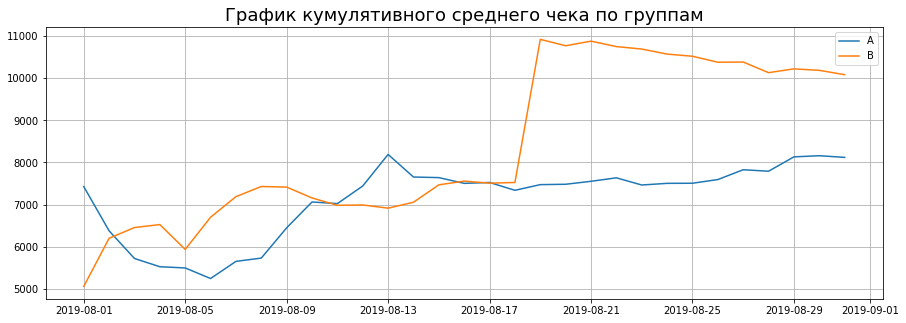

In [12]:
plt.figure(figsize=(15, 5))
plt.title('График кумулятивного среднего чека по группам', fontsize=18)

# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.grid()
plt.show()

*Вывод*:

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и плавно продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

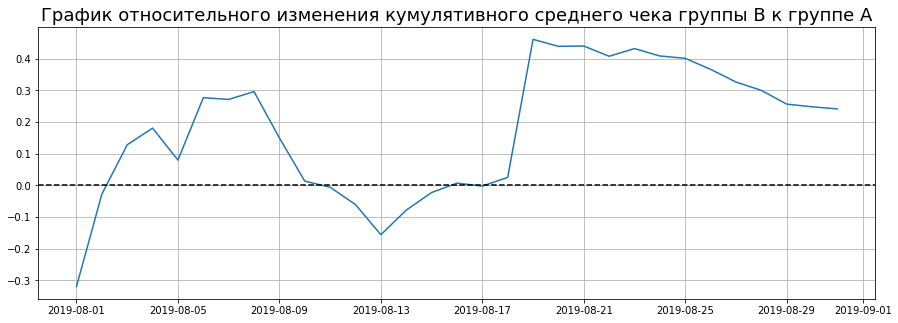

In [13]:
plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.show()

*Вывод*:

В нескольких точках график различия между сегментами резко «скачет». Причиной скачков вероятно являются крупные заказы и выбросы.

#### График кумулятивной конверсии по группам

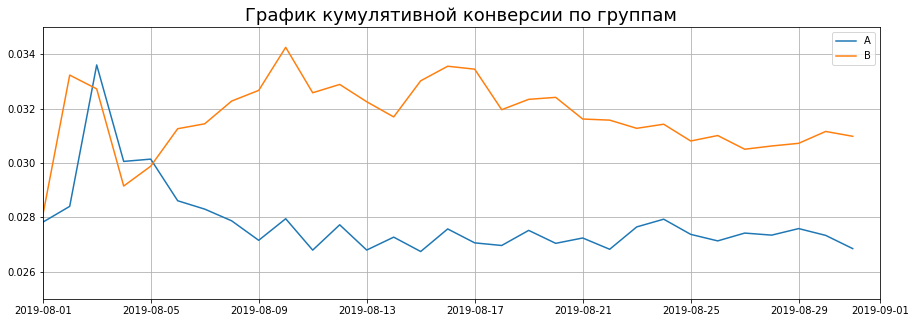

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 5))
plt.title('График кумулятивной конверсии по группам', fontsize=18)

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.035])
plt.grid()
plt.show()

*Вывод*:

Вначале исследуемого периода группа A перехватила лидерствона своем пике, далее конверсия по обеим группам начала снижаться. После чего конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

#### График относительного изменения кумулятивной конверсии группы B к группе A

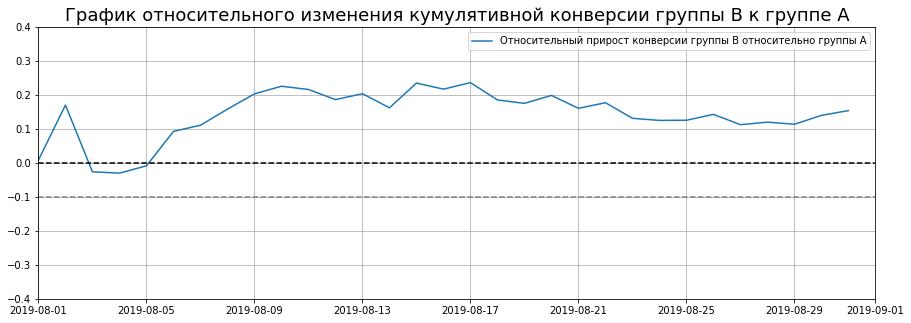

In [15]:
# построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=18)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.grid()
plt.show()

*Вывод*:

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия не значительно колебалась но была стабильно выше группы А.

#### Вывод по разделу

- подготовили данные;
- построили графики;
- проанализировли поведение метрик;
- отметили аномалии и их возможные причины.

### Исследуем аномалии

#### Точечный график количества заказов по пользователям

In [16]:
# подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


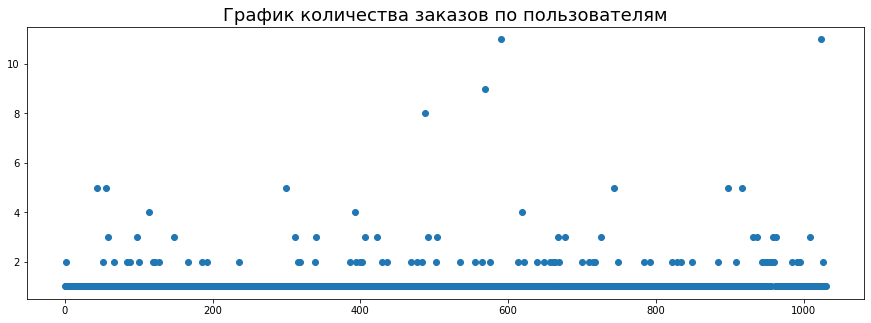

In [17]:
# построим точечный график количества заказов по пользователям
plt.figure(figsize=(15, 5))
plt.title('График количества заказов по пользователям', fontsize=18)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

*Вывод*:

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### Посчитем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [18]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


*Вывод*:

Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более одного раза. Не более 1% пользователей заказывали больше чем 4 заказа. На наш взгляд разумно выбрать 2 или 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### Точечный график стоимостей заказов

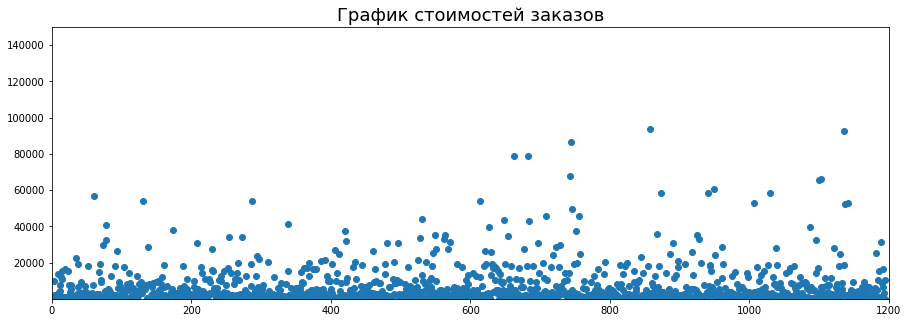

In [19]:
# построим точечный график стоимостей заказов по пользователям
plt.figure(figsize=(15, 5))
plt.title('График стоимостей заказов', fontsize=18)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 1, 150000])
plt.show()

*Вывод*:

По графику видно, что аномально дорогих заказов не много. По графику можно выбрать границу аномальных заказов между 40 000 и 60 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [20]:
# посчитаем выборочные перцентили стоимости заказов на одного пользователя
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


*Вывод*:

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233.2 рублей.

#### Вывод по разделу

- исследовали аномалии;
- выбрали границы.

### Проверка статистических гипотез

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезу:
- H0: различий в конверсии между группами нет;
- H1: различия в конверсии между группами есть.
 - проверка будет проведена статистическим критерием Манна-Уитни;
 - критический уровень значимости p-value=0.05.

In [21]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Наименования стобцов:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Теперь посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [22]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [23]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                  .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                           .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [24]:
# найдём относительные различия в конверсии между группами
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


*Вывод*:

Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезу:
- Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть;
- проверка будет проведена статистическим критерием Манна-Уитни
- критический уровень значимости p-value=0.05

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [25]:
# найдём относительные различия в среднем чеке между группами
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Нулевую гипотезу не отвергаем - статистически значимых различий в среднем чеке заказа между группами нет. Средний чек группы B значительно выше среднего чека группы A.

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Сформулируем гипотезу:
- H0: различий в конверсии между группами нет;
- H1: различия в конверсии между группами есть.
 - проверка будет проведена статистическим критерием Манна-Уитни;
 - критический уровень значимости p-value=0.05.

1) 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2 рублей;

2) 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [60]:
# сделаем срезы и посчитаем сколько всего аномальных пользователей методом shape()
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

74

*Вывод*:

Всего 74 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста.

In [27]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


*Вывод*:

Результаты по конверсии практически не изменились. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезу:

- H0: различий в среднем чеке заказа между группами нет;
- H1: различия в среднем чеке заказа между группами есть.
 - проверка будет проведена статистическим критерием Манна-Уитни;
 - критический уровень значимости p-value=0.05.

In [28]:
# применим статистический критерий Манна-Уитни
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.738
-0.020


*Вывод*:

P-value снизился не значительно, но и разница между сегментами сократилась с 26% до -2%.
Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста.

## Вывод

В данном исследовании мы выполнили анализ А/В-теста. Рассчитали кумулятивные метрики, чтобы исключить проблему подсматривания. Посчитали статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей, применив непараметрический тест Уилкоксона-Манна-Уитни. На основании проведенного исследования мы пришли к следующим выводам:

- Есть статистически значимое различие по конверсии между группами по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеют тенденции к улучшению:
- График различия среднего чека говорит о том, что результаты группы B значительно выше группы А и на момент завершения исследования выше на 25%:

Исходя из обнаруженных фактов, остановить тест, зафиксировать победу группы В.